# Test Run 12 Mini Dataset Exploration w/ Word-level Segments
In this notebook, we implement our switched-decision of using *word* as the segmentation unit. See weekly progress report of 18Fall, week 6 for our argument of using *clause* as the segmentation unit causes many conflict!!! 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
debug_mode=1 # if not in debug mode, please set debug_mode=0, find more info about debug mode in test run 9 maybe?
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
os.environ['SNORKELDB'] = "postgresql:///abstractnetword"
print(os.environ['SNORKELDB'])

from snorkel import SnorkelSession
from snorkel.parser import TSVDocPreprocessor
session = SnorkelSession()

# # Here, we just set how many documents we'll process for automatic testing- you can safely ignore this!
n_docs = 100 # this is the upper limit of number of docs
doc_preprocessor = TSVDocPreprocessor('data/slim-s2-corpus-00-1000', encoding="utf-8",max_docs=n_docs)

from snorkel.parser.spacy_parser import Spacy
from snorkel.parser import CorpusParser

corpus_parser = CorpusParser(parser=Spacy())
%time corpus_parser.apply(doc_preprocessor, count=n_docs)# ,parallelism=5)

from snorkel.models import Document, Sentence  # defined in context.py file

print("Documents:", session.query(Document).count())

postgresql:///abstractnetword
Clearing existing...
snorkel_conn_string postgresql:///abstractnetword
if snorkel_postgres? True
clearning..
clear finished!
Running UDF...
snorkel_conn_string postgresql:///abstractnetword
if snorkel_postgres? True
[========================================] 100%

CPU times: user 2.56 s, sys: 126 ms, total: 2.69 s
Wall time: 3.56 s
Documents: 100


In [1]:
import os
os.environ['SNORKELDB'] = "postgresql:///abstractnetwordfilter"
print(os.environ['SNORKELDB'])

from snorkel import SnorkelSession
from snorkel.parser import TSVDocPreprocessor
session = SnorkelSession()

# # Here, we just set how many documents we'll process for automatic testing- you can safely ignore this!
n_docs = 12000 # this is the upper limit of number of docs
doc_preprocessor = TSVDocPreprocessor('data/slim-positive-citation-s2-corpus-00', encoding="utf-8",max_docs=n_docs)

from snorkel.parser.spacy_parser import Spacy
from snorkel.parser import CorpusParser

corpus_parser = CorpusParser(parser=Spacy())
%time corpus_parser.apply(doc_preprocessor, count=n_docs)# ,parallelism=5)

from snorkel.models import Document, Sentence  # defined in context.py file

print("Documents:", session.query(Document).count())

postgresql:///abstractnetwordfilter
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True


/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
clear finished!
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 4min 27s, sys: 7.14 s, total: 4min 34s
Wall time: 6min 22s
Documents: 10556


In [18]:
from snorkel import SnorkelSession
from snorkel.parser.spacy_parser import Spacy
from snorkel.parser import CorpusParser
from snorkel.models import Document, Sentence
from collections import defaultdict

session = SnorkelSession()
print("Documents:", session.query(Document).count())
print("Sentences:", session.query(Sentence).count())

docs = session.query(Document).all()
sents = session.query(Sentence).all()  # get all sentences from snorkel.db

total_bucket=50
sents_split=defaultdict(lambda:[])
for ind, doc in enumerate(docs):
    bucket=ind%total_bucket
#     print(bucket)
    for s in doc.sentences:
        sents_split[bucket]+=[s]
        
    

Documents: 10556
Sentences: 90872


In [20]:
from snorkel.models import candidate_subclass
from snorkel.candidates import Ngrams, CandidateExtractor
from snorkel.matchers import *
import datetime

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

Unigram = candidate_subclass('Unigram', ['unigram_cue'],values=['PP','MN','NULL'])
ngrams = Ngrams(n_max=1) 
ngram_matcher=NgramMatcher()
unigram_segment_extractor=CandidateExtractor(Unigram,[ngrams],[ngram_matcher])


train_bucket=0
# %time unigram_segment_extractor.apply(train_sents, split=train_bucket)
%time unigram_segment_extractor.apply(sents_split[train_bucket], split=train_bucket)
unigram_segments=session.query(Unigram).filter(Unigram.split == train_bucket).all()
print("len(train_segments)",len(unigram_segments))

Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 16s, sys: 5.48 s, total: 1min 22s
Wall time: 2min 46s
len(train_segments) 49423


In [21]:
from snorkel.lf_helpers import *
from snorkel.annotations import LabelAnnotator
from LF.util_common_default_categorical import purpose_LFs,mechanism_LFs,null_LFs
print("total LF count", len(purpose_LFs+mechanism_LFs+null_LFs),"unique ",len(set(purpose_LFs+mechanism_LFs+null_LFs)),"purpose_LFs",len(purpose_LFs),"mechanism_LFs",len(mechanism_LFs))
print([lf.__name__ for lf in mechanism_LFs])

total LF count 80 unique  80 purpose_LFs 31 mechanism_LFs 35
['LF_mechanism_PRP_VBP3_True', 'LF_mechanism_PRP_VBPneg2_True', 'LF_mechanism_PRP_RB_VBP3_True', 'LF_mechanism_PRP_RB_VBPneg2_True', 'LF_mechanism_we_propose3_True', 'LF_mechanism_we_proposeneg2_True', 'LF_mechanism_we_develop3_True', 'LF_mechanism_we_developneg2_True', 'LF_mechanism_we_provide3_True', 'LF_mechanism_we_provideneg2_True', 'LF_mechanism_we_have_developed3_True', 'LF_mechanism_we_have_developedneg2_True', 'LF_mechanism_we_also_propose3_True', 'LF_mechanism_we_also_proposeneg2_True', 'LF_mechanism_presents_3_True', 'LF_mechanism_presents_neg2_True', 'LF_mechanism_present_3_True', 'LF_mechanism_present_neg2_True', 'LF_mechanism_we_use_3_True', 'LF_mechanism_we_use_neg2_True', 'LF_mechanism_uses_3_True', 'LF_mechanism_uses_neg2_True', 'LF_mechanism_using_a_3_True', 'LF_mechanism_using_a_neg2_True', 'LF_mechanism_by_using3_True', 'LF_mechanism_by_usingneg2_True', 'LF_mechanism_method3_True', 'LF_mechanism_methodneg2

In [22]:
from snorkel.learning import GenerativeModel
from util import get_candidate_text
import matplotlib.pyplot as plt
import datetime

# maybe write a cids_query session.query(Candidate.id).filter(Candidate.split == split) from def apply(self, split=0, key_group=0, replace_key_set=True, cids_query=None,
#         **kwargs):
def get_L_train(LFs,parallelism=1,split=0):
    L_train=None
    labeler=None
    np.random.seed(1701)
    labeler = LabelAnnotator(lfs=LFs)
    print(datetime.datetime.now())
    L_train = labeler.apply(split=split,parallelism=parallelism)# ,cids_query=session.query(Candidate.id).filter(Candidate.get_parent().id %10==1))
    print(datetime.datetime.now())
    print(type(L_train))
    print(L_train.shape)
    printmd("**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  "+str(L_train.non_overlapping_coverage()))
    return L_train

def get_train_marginals(L_train,step_size_nominator=0.1,epochs=100,threads=1,class_prior=False,decay=1.0,reg_param=1e-6):
    try:
        gen_model=None
        print(datetime.datetime.now())
        gen_model = GenerativeModel(lf_propensity=True,class_prior=class_prior)
#         gen_model.train(L_train, cardinality=3, epochs=100, decay=0.95, step_size=step_size_nominator/L_train.shape[0], reg_param=0.0,verbose=False,threads=threads) # try step_size = 1/ next time? 
        gen_model.train(L_train, cardinality=3, epochs=epochs, decay=decay,step_size=step_size_nominator/1e2,reg_param=reg_param,verbose=False,threads=threads)
        print("training finished ")
        print(datetime.datetime.now())
        print("Finished training generative model, now checking performance against development set labels...")
        print("Calculating marginals!")
        train_marginals = gen_model.marginals(L_train)  # the marginal probability of each candidate being True
#         assert np.all(train_marginals.sum(axis=1) - np.ones(train_marginals.shape[0]) < 1e-10)
        print("no exception")
        print(datetime.datetime.now())
        return gen_model,train_marginals
    except:
        print("exception! ")
        return gen_model,train_marginals


In [23]:
L_train=get_L_train(purpose_LFs+mechanism_LFs+null_LFs)

snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-10 22:35:49.762663
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 49423
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-10 22:41:32.477841
<class 'snorkel.annotations.csr_LabelMatrix'>
(49423, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6867652712299941

In [24]:
print(len(purpose_LFs+mechanism_LFs+null_LFs))
print(L_train.shape)

80
(49423, 77)


In [25]:
import pandas as pd 
pd.set_option('display.max_rows', 500)

L_train.lf_stats(session)

,j,Coverage,Overlaps,Conflicts
LF_purpose_TO_VB_neg2_True,0,0.162677,0.136030,0.081157
LF_purpose_that_can3_True,1,0.000688,0.000627,0.000364
LF_purpose_that_canneg2_True,2,0.005038,0.004856,0.002489
LF_purpose_for_the3_True,3,0.004168,0.004168,0.002266
LF_purpose_for_theneg2_True,4,0.030957,0.030957,0.018230
LF_purpose_for3_True,5,0.059082,0.053052,0.027518
LF_purpose_forneg2_True,6,0.262752,0.214859,0.135564
LF_purpose_goal3_True,7,0.000911,0.000789,0.000425
LF_purpose_goalneg2_True,8,0.004492,0.004026,0.001963
LF_purpose_problem3_True,9,0.007223,0.007223,0.003662


In [26]:
# for reg_param in [1e-3]: #[1e-3, 1e-6]:
#     for decay in [0.95]: #[1.0,0.95]:
#         for step_size_nominator in [0.001]: # [0.01, 0.1, 1]:
#             for epochs in [5]: #,10]:#,30,50,100,200,500]:
#                 print("grid search with L_train","step_size_nominator",step_size_nominator,"epochs",epochs,"decay",decay,"reg_param",reg_param)

                
reg_param=1e-3
decay=0.95
step_size_nominator=0.001
epochs=5
                        
gen_model,train_marginals=get_train_marginals(L_train,threads=18,step_size_nominator=step_size_nominator,epochs=epochs,decay=decay,reg_param=reg_param)
assert np.all(train_marginals.sum(axis=1) - np.ones(train_marginals.shape[0]) < 1e-10)

winHighlight=train_marginals.argmax(axis=1)
print("PP",(winHighlight==0).sum())
print("MN",(winHighlight==1).sum())
print("NULL",(winHighlight==2).sum())

# Amendment!!! winning highligh with default as NULL (the last occurence of largest value)
train_marginals_reverse = train_marginals[:,::-1]
winHighlight = train_marginals.shape[1] - np.argmax(train_marginals_reverse,axis=1) - 1
print("amend PP",(winHighlight==0).sum())
print("amend MN",(winHighlight==1).sum())
print("amend NULL",(winHighlight==2).sum())


2018-10-10 22:43:17.941988
Compiles variable matrix
_compile finished!
Compiles variable matrix
_compile finished!
training finished 
2018-10-10 22:45:55.905724
Finished training generative model, now checking performance against development set labels...
Calculating marginals!
no exception
2018-10-10 22:46:06.602893
PP 37143
MN 8483
NULL 3797
amend PP 21662
amend MN 8483
amend NULL 19278


Let's check if the generative labels makes any sense. -> Seems okay. 

0
10000
20000
30000
40000
dispatch finished!! 


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0
10000
20000
30000
40000
dispatch finished!! 


<Figure size 432x288 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

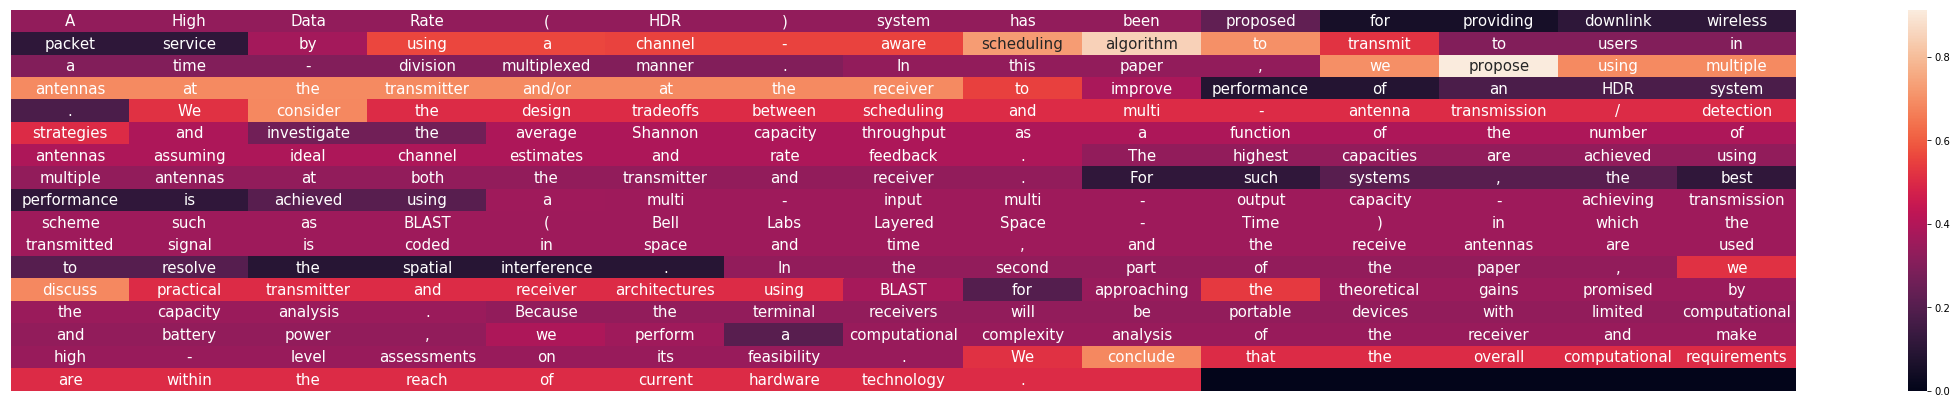

In [28]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import os 

def pad_reshape(A,width,isFloat=False):
    B=np.empty([1,int(A.shape[1]/width+1)*width],dtype=object)
    if isFloat:
        B=np.zeros([1,int(A.shape[1]/width+1)*width])
        B[:,:A.shape[1]]=A
    else:
        B[:,:A.shape[1]]=A
        B[:,A.shape[1]:]=""
    return B.reshape(-1,width)
    
def visualize_word_level(tag,unigram_segments,score_list,directory="data/word_level_tag_visualization"):
    doc_dict=defaultdict(lambda:[])

    pair_list=list(zip(unigram_segments,score_list))

    for ind,pair in enumerate(pair_list):
        if ind%10000==0:
            print(ind)
        docid=pair[0].get_parent().get_parent().name
        doc_dict[docid]+=[pair]

    print("dispatch finished!! ")

    for docid in doc_dict:
        plt.clf()
        doc_dict[docid]=sorted(doc_dict[docid], key=lambda pair: (pair[0].get_parent().position, pair[0].get_contexts()[0].get_word_start()))
        ordered_word_score_list=[(pair[0].get_parent().text[pair[0].unigram_cue.char_start:pair[0].unigram_cue.char_end+1], pair[1]) for pair in doc_dict[docid]]
        df=pd.DataFrame.from_records(ordered_word_score_list,columns=['word','score'])
        fig, ax = plt.subplots(figsize=(40,7))  
        width=15
        sns.heatmap(pad_reshape(np.asarray(df[['score']]).reshape(1,-1),width,isFloat=True), annot=pad_reshape(np.asarray(df[['word']]).reshape(1,-1),width),fmt='',yticklabels=False,xticklabels=False,ax=ax,annot_kws={"size": 15})
        plt.savefig(os.path.join(directory,"run",docid+"_"+tag))
  
sample_size=50
visualize_word_level("PP",unigram_segments[:sample_size],list(train_marginals[:sample_size,0].reshape(-1))) 
visualize_word_level("MN",unigram_segments[:sample_size],list(train_marginals[:sample_size,1].reshape(-1)))
    

### Section 3: writing soft generative noisy labels

In [34]:
from collections import defaultdict
import pandas as pd

# initialize some variables
# df = pd.DataFrame([], columns=['winningHighlight', 'paperID', 'globalPsn','content'])    

# aspects_list=["Purpose","Mechanism","Others"]

def get_candidate_text(segment):
    return segment.get_parent().text[segment.unigram_cue.char_start:segment.unigram_cue.char_end+1]


def write_csv_gen_label(unigram_segments,train_marginals,csv_path):
    aggregated_doc=defaultdict(lambda:[])
    aggregated_sent=defaultdict(lambda:[])
    for idx,train_segment in enumerate(unigram_segments):
        sent_id=train_segment.get_parent().id    
        winningHighlight=list(train_marginals[idx])
        cue=train_segment.get_contexts()[0]
        aggregated_sent[sent_id]+=[(cue.char_start,cue.char_end,get_candidate_text(train_segment),winningHighlight)]

        doc_id=train_segment.get_parent().get_parent().name
        if doc_id not in aggregated_doc:
            aggregated_doc[doc_id]=train_segment.get_parent().get_parent().sentences


    df_list=[]      
    for doc_id in aggregated_doc:
        globalPsn=1
        for sent in aggregated_doc[doc_id]:
            sent_id=sent.id
            if sent_id not in aggregated_sent:
                raise ValueError('we have no info about this sent'+str(sent))
            aggregated_sent[sent_id]=sorted(aggregated_sent[sent_id], key=lambda x: x[0])
            for idx,pair in enumerate(aggregated_sent[sent_id]):
                text=pair[2]
                df_list+=[[pair[3],doc_id,globalPsn,text]]
                globalPsn+=1


    df=pd.DataFrame(df_list,columns=['winningHighlight', 'paperID', 'globalPsn','content'])
    df.to_csv(open(csv_path,"w"))   # in the spreadsheet, punctuations are splitted

write_csv_gen_label(unigram_segments,train_marginals,"data/annotations_slim_s2/split"+str(0)+".csv")

In [36]:
# This code loop through all splits, create unigram_segments, L_train and train_marginals (named as "_tmp")
for train_bucket in range(1,len(sents_split)):
    %time unigram_segment_extractor.apply(sents_split[train_bucket], split=train_bucket)
    unigram_segments_tmp=session.query(Unigram).filter(Unigram.split == train_bucket).all()
    print("len(train_segments)",len(unigram_segments_tmp))
    print("applying L_train_tmp")
    L_train_tmp=get_L_train(purpose_LFs+mechanism_LFs+null_LFs,split=train_bucket)
    print("creating train_marginals")
    train_marginals_tmp = gen_model.marginals(L_train_tmp)
    write_csv_gen_label(unigram_segments_tmp,train_marginals_tmp,"data/annotations_slim_s2/split"+str(train_bucket)+".csv")


Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 30.6 s, sys: 1.89 s, total: 32.5 s
Wall time: 4min 43s
len(train_segments) 47525
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-10 23:54:43.216483
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47525
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 00:00:46.659270
<class 'snorkel.annotations.csr_LabelMatrix'>
(47525, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6954024197790637

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 30.8 s, sys: 2.2 s, total: 33 s
Wall time: 4min 52s
len(train_segments) 48006
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 00:06:58.717420
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48006
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 00:12:56.589932
<class 'snorkel.annotations.csr_LabelMatrix'>
(48006, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6798525184351956

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 12s, sys: 4.3 s, total: 1min 17s
Wall time: 2min 34s
len(train_segments) 48687
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 00:16:47.958032
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48687
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 00:22:51.558985
<class 'snorkel.annotations.csr_LabelMatrix'>
(48687, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.68322139380122

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 14s, sys: 4.61 s, total: 1min 18s
Wall time: 2min 43s
len(train_segments) 49113
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 00:26:50.812635
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 49113
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 00:32:56.410856
<class 'snorkel.annotations.csr_LabelMatrix'>
(49113, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6754219860322115

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 14s, sys: 4.32 s, total: 1min 18s
Wall time: 2min 41s
len(train_segments) 48989
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 00:36:53.256088
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48989
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 00:42:56.171901
<class 'snorkel.annotations.csr_LabelMatrix'>
(48989, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6727020351507481

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 18s, sys: 5.12 s, total: 1min 23s
Wall time: 2min 53s
len(train_segments) 48266
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 00:47:07.063965
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48266
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 00:53:14.083477
<class 'snorkel.annotations.csr_LabelMatrix'>
(48266, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6694153234160692

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.13 s, total: 1min 15s
Wall time: 2min 29s
len(train_segments) 47885
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 00:57:06.197083
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47885
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 01:03:08.440841
<class 'snorkel.annotations.csr_LabelMatrix'>
(47885, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6674950402004803

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 12s, sys: 4.47 s, total: 1min 17s
Wall time: 2min 32s
len(train_segments) 47471
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 01:07:02.051478
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47471
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 01:12:58.710151
<class 'snorkel.annotations.csr_LabelMatrix'>
(47471, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6743906806260664

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 9s, sys: 4.2 s, total: 1min 13s
Wall time: 2min 30s
len(train_segments) 46886
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 01:16:50.595829
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 46886
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 01:22:42.614989
<class 'snorkel.annotations.csr_LabelMatrix'>
(46886, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6980761847886363

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 10s, sys: 4.37 s, total: 1min 15s
Wall time: 2min 36s
len(train_segments) 47351
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 01:26:33.035898
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47351
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 01:32:27.815342
<class 'snorkel.annotations.csr_LabelMatrix'>
(47351, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6879052184747946

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 8s, sys: 4.07 s, total: 1min 12s
Wall time: 2min 29s
len(train_segments) 48575
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 01:36:11.491903
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48575
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 01:42:11.439841
<class 'snorkel.annotations.csr_LabelMatrix'>
(48575, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6778795676788472

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 16s, sys: 4.53 s, total: 1min 21s
Wall time: 2min 47s
len(train_segments) 49832
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 01:46:13.401092
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 49832
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 01:52:27.552720
<class 'snorkel.annotations.csr_LabelMatrix'>
(49832, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6753692406485792

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.27 s, total: 1min 15s
Wall time: 2min 34s
len(train_segments) 48155
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 01:56:20.474917
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48155
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 02:02:22.203504
<class 'snorkel.annotations.csr_LabelMatrix'>
(48155, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6928252517910912

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.34 s, total: 1min 17s
Wall time: 2min 41s
len(train_segments) 48725
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 02:06:20.952129
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48725
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 02:12:19.939272
<class 'snorkel.annotations.csr_LabelMatrix'>
(48725, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6639096972806567

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.15 s, total: 1min 15s
Wall time: 2min 31s
len(train_segments) 47765
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 02:16:07.648212
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47765
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 02:22:07.578903
<class 'snorkel.annotations.csr_LabelMatrix'>
(47765, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6916361352454726

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 12s, sys: 4.38 s, total: 1min 17s
Wall time: 2min 40s
len(train_segments) 48260
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 02:26:03.147046
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48260
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 02:32:02.040038
<class 'snorkel.annotations.csr_LabelMatrix'>
(48260, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6762950683796104

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.65 s, total: 1min 20s
Wall time: 2min 45s
len(train_segments) 48789
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 02:36:03.004164
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48789
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 02:42:08.985702
<class 'snorkel.annotations.csr_LabelMatrix'>
(48789, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6848879870462604

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.38 s, total: 1min 17s
Wall time: 2min 42s
len(train_segments) 48264
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 02:46:07.918806
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48264
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 02:52:07.027147
<class 'snorkel.annotations.csr_LabelMatrix'>
(48264, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6727996021879662

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.66 s, total: 1min 20s
Wall time: 2min 46s
len(train_segments) 48860
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 02:56:09.144675
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48860
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 03:02:14.332253
<class 'snorkel.annotations.csr_LabelMatrix'>
(48860, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6822144903806795

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 14s, sys: 4.57 s, total: 1min 18s
Wall time: 2min 40s
len(train_segments) 48571
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 03:06:11.734915
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48571
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 03:12:16.572712
<class 'snorkel.annotations.csr_LabelMatrix'>
(48571, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.686232525581108

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 12s, sys: 4.32 s, total: 1min 16s
Wall time: 2min 27s
len(train_segments) 48583
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 03:16:02.259607
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48583
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 03:22:01.483916
<class 'snorkel.annotations.csr_LabelMatrix'>
(48583, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6640388613300949

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.27 s, total: 1min 17s
Wall time: 2min 40s
len(train_segments) 49193
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 03:25:58.325876
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 49193
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 03:32:03.532442
<class 'snorkel.annotations.csr_LabelMatrix'>
(49193, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6682861382717054

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.41 s, total: 1min 15s
Wall time: 2min 36s
len(train_segments) 47554
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 03:35:57.864823
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47554
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 03:41:51.733322
<class 'snorkel.annotations.csr_LabelMatrix'>
(47554, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.674412247129579

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.54 s, total: 1min 19s
Wall time: 2min 44s
len(train_segments) 48551
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 03:45:50.201378
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48551
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 03:51:51.396553
<class 'snorkel.annotations.csr_LabelMatrix'>
(48551, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6749191571749295

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.64 s, total: 1min 20s
Wall time: 2min 46s
len(train_segments) 50082
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 03:55:54.561336
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 50082
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 04:02:09.973746
<class 'snorkel.annotations.csr_LabelMatrix'>
(50082, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6817419432131304

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.25 s, total: 1min 16s
Wall time: 2min 38s
len(train_segments) 47396
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 04:06:07.148535
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47396
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 04:11:59.995023
<class 'snorkel.annotations.csr_LabelMatrix'>
(47396, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6800784876360875

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 14s, sys: 4.67 s, total: 1min 18s
Wall time: 2min 43s
len(train_segments) 48453
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 04:15:57.942951
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48453
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 04:21:58.886378
<class 'snorkel.annotations.csr_LabelMatrix'>
(48453, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.686355849998968

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 14s, sys: 4.53 s, total: 1min 19s
Wall time: 2min 44s
len(train_segments) 48407
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 04:25:58.101495
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48407
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 04:31:59.990351
<class 'snorkel.annotations.csr_LabelMatrix'>
(48407, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.676017931290929

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.3 s, total: 1min 16s
Wall time: 2min 38s
len(train_segments) 48496
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 04:35:55.061968
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48496
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 04:41:56.598102
<class 'snorkel.annotations.csr_LabelMatrix'>
(48496, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6724059716265259

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.57 s, total: 1min 17s
Wall time: 2min 41s
len(train_segments) 48563
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 04:45:56.120179
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48563
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 04:51:59.268475
<class 'snorkel.annotations.csr_LabelMatrix'>
(48563, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6999155735848279

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.4 s, total: 1min 19s
Wall time: 2min 42s
len(train_segments) 47936
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 04:55:57.428089
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47936
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 05:01:55.259001
<class 'snorkel.annotations.csr_LabelMatrix'>
(47936, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6709362483311081

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.48 s, total: 1min 18s
Wall time: 2min 41s
len(train_segments) 49240
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 05:05:51.908838
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 49240
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 05:12:01.515707
<class 'snorkel.annotations.csr_LabelMatrix'>
(49240, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6884646628757108

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.33 s, total: 1min 15s
Wall time: 2min 32s
len(train_segments) 48480
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 05:15:51.018256
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48480
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 05:21:49.690891
<class 'snorkel.annotations.csr_LabelMatrix'>
(48480, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6783415841584158

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 8s, sys: 4.08 s, total: 1min 12s
Wall time: 2min 27s
len(train_segments) 47677
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 05:25:32.734654
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47677
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 05:31:23.884284
<class 'snorkel.annotations.csr_LabelMatrix'>
(47677, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6693374163642847

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 12s, sys: 4.29 s, total: 1min 16s
Wall time: 2min 34s
len(train_segments) 48447
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 05:35:13.452104
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48447
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 05:41:10.760685
<class 'snorkel.annotations.csr_LabelMatrix'>
(48447, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6943876813837803

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.42 s, total: 1min 16s
Wall time: 2min 32s
len(train_segments) 48065
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 05:44:59.274773
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48065
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 05:50:55.584875
<class 'snorkel.annotations.csr_LabelMatrix'>
(48065, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6771039217725996

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.42 s, total: 1min 16s
Wall time: 2min 34s
len(train_segments) 48290
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 05:54:46.734279
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48290
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 06:00:43.760899
<class 'snorkel.annotations.csr_LabelMatrix'>
(48290, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6834541312901222

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.4 s, total: 1min 17s
Wall time: 2min 43s
len(train_segments) 48028
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 06:04:42.803650
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48028
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 06:10:37.573089
<class 'snorkel.annotations.csr_LabelMatrix'>
(48028, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6702132089614392

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 11s, sys: 4.25 s, total: 1min 15s
Wall time: 2min 35s
len(train_segments) 47643
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 06:14:30.509269
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 47643
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 06:20:25.496747
<class 'snorkel.annotations.csr_LabelMatrix'>
(47643, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6872363201309741

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.6 s, total: 1min 17s
Wall time: 2min 42s
len(train_segments) 48444
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 06:24:23.030475
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48444
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 06:30:26.147106
<class 'snorkel.annotations.csr_LabelMatrix'>
(48444, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6884237470068533

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.45 s, total: 1min 17s
Wall time: 2min 42s
len(train_segments) 48371
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 06:34:26.072405
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48371
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 06:40:26.614800
<class 'snorkel.annotations.csr_LabelMatrix'>
(48371, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6917781315250874

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.33 s, total: 1min 18s
Wall time: 2min 42s
len(train_segments) 48086
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 06:44:23.303413
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48086
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 06:50:24.731041
<class 'snorkel.annotations.csr_LabelMatrix'>
(48086, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6897433764505262

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 12s, sys: 4.47 s, total: 1min 17s
Wall time: 2min 41s
len(train_segments) 48184
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 06:54:21.430690
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48184
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 07:00:19.084200
<class 'snorkel.annotations.csr_LabelMatrix'>
(48184, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.671965797775195

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.38 s, total: 1min 17s
Wall time: 2min 42s
len(train_segments) 48734
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 07:04:18.187508
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48734
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 07:10:20.373108
<class 'snorkel.annotations.csr_LabelMatrix'>
(48734, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6669265810317232

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 14s, sys: 4.62 s, total: 1min 19s
Wall time: 2min 42s
len(train_segments) 48653
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 07:14:19.049152
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48653
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 07:20:22.356436
<class 'snorkel.annotations.csr_LabelMatrix'>
(48653, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6875423920416007

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.44 s, total: 1min 17s
Wall time: 2min 42s
len(train_segments) 48783
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 07:24:23.283617
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48783
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 07:30:24.421711
<class 'snorkel.annotations.csr_LabelMatrix'>
(48783, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.680769940348072

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.64 s, total: 1min 20s
Wall time: 2min 44s
len(train_segments) 48820
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 07:34:23.293054
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48820
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 07:40:23.591881
<class 'snorkel.annotations.csr_LabelMatrix'>
(48820, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.672204014748054

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 13s, sys: 4.42 s, total: 1min 17s
Wall time: 2min 40s
len(train_segments) 48674
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 07:44:20.964653
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 48674
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 07:50:24.789224
<class 'snorkel.annotations.csr_LabelMatrix'>
(48674, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.6804865020339401

creating train_marginals
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

CPU times: user 1min 15s, sys: 4.52 s, total: 1min 19s
Wall time: 2min 35s
len(train_segments) 49057
applying L_train_tmp
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
2018-10-11 07:54:15.206806
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
cids_count 49057
key_group 0
Clearing existing...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
clearning..
Running UDF...
snorkel_conn_string postgresql:///abstractnetwordfilter
if snorkel_postgres? True
[========================================] 100%

2018-10-11 08:00:20.845986
<class 'snorkel.annotations.csr_LabelMatrix'>
(49057, 77)


**Total non_overlapping_coverage on L_train (percentage of labelled over all)**  0.675051470738121

creating train_marginals


In [64]:
# You're trying to build one large dataframe out of the rows of many dataframes who all have the same column names. axis should be 0 (the default), not 1. Also you don't need to specify a type of join. This will have no effect since the column names are the same for each dataframe.

# df = pd.concat([df1, df2, df3])

sub_dfs=[]
for train_bucket in range(len(sents_split)):
    sub_dfs+=[pd.read_csv(open("data/annotations_slim_s2/split"+str(train_bucket)+".csv","r"))]
df = pd.concat(sub_dfs)
df=df.drop(columns=['Unnamed: 0'])
# df.to_csv(open("data/annotations_slim_s2/joint_split.csv","w"))

In [56]:
# revise joint_split.csv to have literally hard label in soft format e.g. [0.4, 0.3, 0.3 ] -> [1.0, 0.0, 0.0]
print(len(sub_dfs))

print(len(set((df['paperID'].tolist()))))
print(df.columns)

df[df['paperID']=="semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436b0691e6"]

50
10556
Index(['winningHighlight', 'paperID', 'globalPsn', 'content'], dtype='object')


,winningHighlight,paperID,globalPsn,content
22856,"[0.9000218378642625, 0.04998908106786876, 0.04...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,1,Design
22857,"[0.3333333333333333, 0.3333333333333333, 0.333...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,2,Science
22858,"[0.3333333333333333, 0.3333333333333333, 0.333...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,3,Research
22859,"[0.5565563714814038, 0.36139655035929674, 0.08...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,4,(
22860,"[0.9000218378642625, 0.04998908106786876, 0.04...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,5,DSR
22861,"[0.3333333333333333, 0.3333333333333333, 0.333...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,6,)
22862,"[0.7747526735488279, 0.11262366322558603, 0.11...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,7,has
22863,"[0.566841311319671, 0.21657934434016446, 0.216...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,8,sparked
22864,"[0.566841311319671, 0.21657934434016446, 0.216...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,9,a
22865,"[0.3333333333333333, 0.3333333333333333, 0.333...",semanticDBLP_6accd6b8bdef57b1455d5bb6cdcc8c436...,10,renaissance


In [68]:
df2=df.copy()
import ast
import numpy as np

def transform_gm_label(x):
    x=ast.literal_eval(x)
    if abs(x[0]-x[1])<1e-4 and abs(x[1]-x[2])<1e-4:
        return [0,0,1]
    elif np.argmax(x)==0:
        return [1,0,0]
    return [0,1,0]

df2['winningHighlight'] = df2['winningHighlight'].apply(lambda x: transform_gm_label(x))
# df2

In [72]:
df2.to_csv(open("data/annotations_slim_s2/joint_split_hard_as_soft.csv","w"))

#### Section 4: peripheral codes

In [16]:
pair_list=list(zip(unigram_segments,list(train_marginals[:,0].reshape(-1))))

pair_list.sort(key = lambda t: t[1],reverse=True)

def get_candidate_text(candidate):
    cue=candidate.get_contexts()[0]
    return cue.sentence.text[cue.char_start:cue.char_end+1]

top_cutoff=10
print("top purpose words \n\n")
print("\n\n".join([str(ind)+"\tWord\t"+get_candidate_text(pair[0])+"\n"+"Sentence\t"+str(pair[0].get_parent().text)+"\t"+str(pair[1]) for ind,pair in enumerate(pair_list[:top_cutoff])]))


pair_list=list(zip(unigram_segments,list(train_marginals[:,1].reshape(-1))))
pair_list.sort(key = lambda t: t[1],reverse=True)

print("\n\n\ntop mechanism words \n\n")
print("\n\n".join([str(ind)+"\tWord\t"+get_candidate_text(pair[0])+"\n"+"Sentence\t"+str(pair[0].get_parent().text)+"\t"+str(pair[1]) for ind,pair in enumerate(pair_list[:top_cutoff])]))

top purpose words 


0	Word	to
Sentence	In our register allocation method, we construct an extended conflict graph (ECG) whose vertices are variables and the weight of each edge shows the cost of assigning two endpoint variables of the edge to a register.	0.9999999999999898

1	Word	of
Sentence	This paper attempts to lay a firmer foundtion for a theory of these problems.	0.9999999999999851

2	Word	at
Sentence	Taking the midpoint of the untransformed confidence interval as our point estimator of the expected simulation response at the selected factor-level combination and approximating the variance of this point estimator via the delta method, we formulate an approximate two-sample Student <i>t</i>-test for validating our metamodel-based estimator versus the results of making independent runs of the simulation at the selected factor-level combination.	0.9999999999999769

3	Word	in
Sentence	Based on this scenario, this paper proposes an approach with the purpose of supporting the unique o

In [17]:
# TODO get_surrounding_words maybe group segments back to doc level from  Sentence has words in its __dict__ 

# visualize purpose probability


# pair_list=list(zip(unigram_segments,list(train_marginals[:,0].reshape(-1))))

# count=0
# for idx,segment in enumerate(unigram_segments):
#     if "by" in segment.get_parent().__dict__['words']:
#         print(idx,segment.get_parent().__dict__['text'])
#         if count>30:
#             break
#         count+=1
        
from LF.util_common_default_categorical import purpose_LFs,mechanism_LFs

for i in range(288,305):
    print(unigram_segments[i])
    print(unigram_segments[i].get_parent().__dict__['text'])
    print(mechanism_LFs[-1](unigram_segments[i]))
    print()
    
    
# print(unigram_segments[165],)

segment=unigram_segments[165]
# print((segment.get_contexts()[0].__dict__))
docid=segment.get_parent().get_parent().name
print(segment)
print("sent __dict__",segment.get_parent().__dict__)
print("sent pos in doc??", segment.get_parent().position)
# print("sent pos in doc??", segment.get_parent().get_parent().sentences.index(segment.get_parent()))

print(docid)

# print(segment.get_parent().get_parent().__dict__)
print(segment.get_parent().text[segment.unigram_cue.char_start:segment.unigram_cue.char_end+1])

unigram_psn=segment.unigram_cue.get_word_start()
print("unigram position?? ",unigram_psn)#.__dict__['words'])

its_pos_tag=segment.get_parent().__dict__['pos_tags'][unigram_psn]
print("its_pos_tag",its_pos_tag,"\n")

# its_surrounding_pos_tag=get_sourrounding_pos_tag(segment,3)
# print("unigram pos tag",get_sourrounding_pos_tag(segment,1))
# print("trigram pos tag",get_sourrounding_pos_tag(segment,3))
# print("5gram pos tag",get_sourrounding_pos_tag(segment,5))


Unigram(Span("b'roots'", sentence=116, chars=[119,123], words=[21,21]))
We show that the global minimum of this criterion can be reached by first solving a linear system then calculating the roots of some polynomial of order K .
MN

Unigram(Span("b'reached'", sentence=116, chars=[57,63], words=[11,11]))
We show that the global minimum of this criterion can be reached by first solving a linear system then calculating the roots of some polynomial of order K .
0

Unigram(Span("b'of'", sentence=116, chars=[125,126], words=[22,22]))
We show that the global minimum of this criterion can be reached by first solving a linear system then calculating the roots of some polynomial of order K .
MN

Unigram(Span("b'We'", sentence=116, chars=[0,1], words=[0,0]))
We show that the global minimum of this criterion can be reached by first solving a linear system then calculating the roots of some polynomial of order K .
0

Unigram(Span("b'by'", sentence=116, chars=[65,66], words=[12,12]))
We show that th